**6추가 추가활동**
> 2020603010 김도은

# 데이터 읽어들이기

In [1]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X, y = cancer['data'], cancer['target']

# 데이터 탐색

## 데이터 정보

In [2]:
# 데이터 정보 알아보기
print(cancer['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [3]:
# 타겟명 출력
print(cancer['target_names']) # malignant(악성), benign(양성)

['malignant' 'benign']


## 데이터 살펴보고 시각화

In [4]:
print("features shape: ", cancer.data.shape)
print("target shape: ", cancer.target.shape)

malignant = cancer.data[cancer.target == 0]
benign = cancer.data[cancer.target == 1]
print("malignant(악성): ", malignant.shape)
print("benign(양성): ", benign.shape)

features shape:  (569, 30)
target shape:  (569,)
malignant(악성):  (212, 30)
benign(양성):  (357, 30)


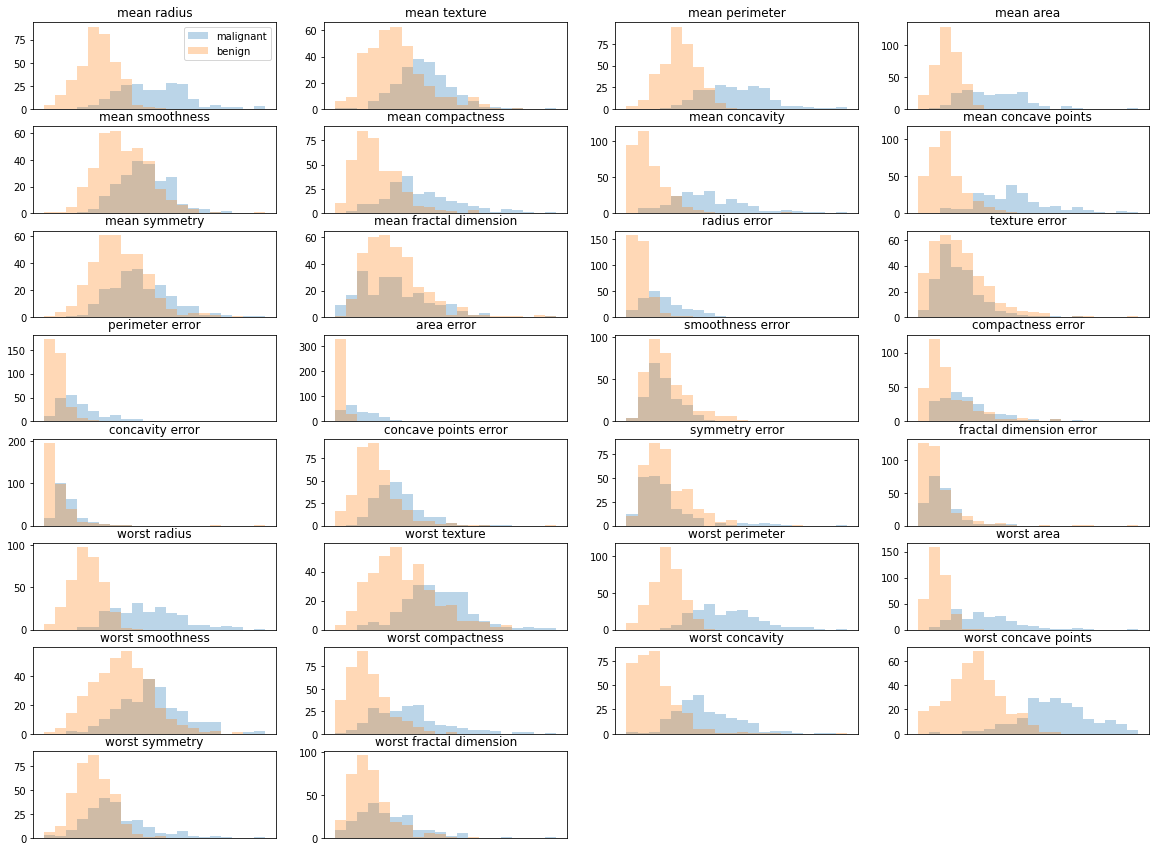

In [5]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(20,15))

for col in range(30):
    plt.subplot(8,4,col+1)
    _, bins=np.histogram(cancer.data[:,col], bins=20)

    plt.hist(malignant[:,col],bins=bins, alpha=0.3)
    plt.hist(benign[:,col], bins=bins ,alpha=0.3)
    plt.title(cancer.feature_names[col])
    if col==0: plt.legend(cancer.target_names)
    plt.xticks([])

# train, test 세트 나누기

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

# 표준화

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit_transform(X_train)

array([[-0.26054047, -0.54581897, -0.32343733, ..., -0.30441153,
        -0.65416069, -0.44030908],
       [ 1.57583813,  0.10017465,  1.57882211, ...,  2.02453206,
        -0.26042929,  2.44452952],
       [ 3.13647566,  1.27449876,  3.26055959, ...,  2.5692434 ,
        -0.89882505,  1.11729875],
       ...,
       [ 2.13869101, -0.49275521,  1.99925648, ...,  0.98504126,
        -0.64767951, -1.04943247],
       [-0.60734881, -1.09722067, -0.59177338, ..., -0.77800778,
        -0.26366988, -0.07451133],
       [ 0.80262609,  0.20168793,  0.71322193, ..., -0.11043377,
         0.59184526, -1.06292059]])

# KNN

### n_neighbors=3 (기본값)

In [35]:
from sklearn.neighbors import KNeighborsClassifier
knc= KNeighborsClassifier()
knc_pred= knc.fit(X_train, y_train).predict(X_test)

In [36]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
print("k=3일 때: ")
print("accuracy score: ", accuracy_score(y_test, knc_pred))
print("CV score:       ", cross_val_score(knc, X_train, y_train, cv=5, scoring='accuracy').mean())

k=3일 때: 
accuracy score:  0.9210526315789473
CV score:        0.9318681318681319


> 비슷한 점수를 보이고 있으므로 크게 과적합된 거 같진 않아 보임

하이퍼파라미터 튜닝

In [37]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_neighbors' : [1, 2, 3, 4, 5, 6, 7, 10, 15]
}

grid_search = GridSearchCV(knc, param_grid, cv=5, scoring='accuracy', return_train_score=True)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 10, 15]},
             return_train_score=True, scoring='accuracy')

In [38]:
grid_search.best_params_

{'n_neighbors': 6}

### n_neighbors=6

In [110]:
# 하이퍼파라미터 탐색을 통한 결과값을 통해 모델 재학습
knc= KNeighborsClassifier(n_neighbors=6)
knc_pred= knc.fit(X_train, y_train).predict(X_test)

print("k=6일 때: ")
print("accuracy score: ", accuracy_score(y_test, knc_pred))
print("CV score:       ", cross_val_score(knc, X_train, y_train, cv=5, scoring='accuracy').mean())

k=6일 때: 
accuracy score:  0.9210526315789473
CV score:        0.9406593406593406


> 하이퍼파라미터 탐색을 통해 튜닝을 해준 결과 성능 향상이 있었음

> 다만 test set과의 score 간격이 좀 더 생겼음

### 오차행렬

In [87]:
knc_train_pred = cross_val_predict(knc, X_train, y_train, cv=5)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train, knc_train_pred)
cm

array([[158,  15],
       [ 12, 270]])

In [88]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

print("정밀도(Precision) : ", precision_score(y_train, knc_train_pred))
print("재현율(Recall)    : ", recall_score(y_train, knc_train_pred))
print("f1 score          : ", f1_score(y_train, knc_train_pred))

정밀도(Precision) :  0.9473684210526315
재현율(Recall)    :  0.9574468085106383
f1 score          :  0.9523809523809523


* 정밀도와 재현율 중 어느 것이 더 중요할까?
- 해당 문제에서는 양성(Positive)라고 예측하고 틀린 경우(False) 즉 FP이 높아서는 안 되는 문제
- 즉, 정밀도가 더 높아야 한다

### ROC curve

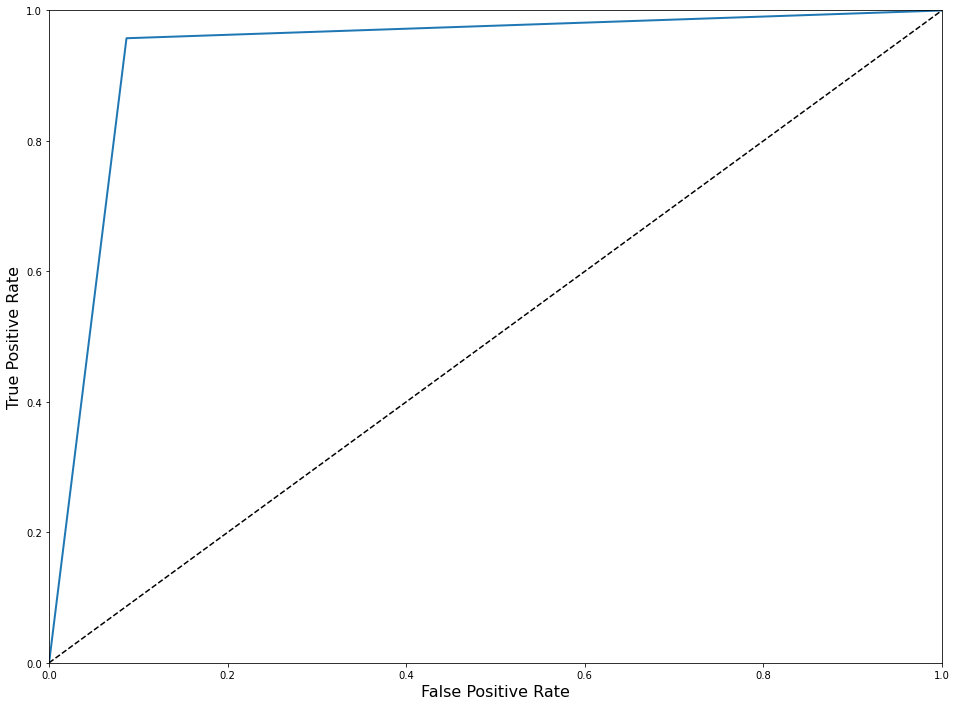

In [168]:
from sklearn.metrics import roc_curve
y_scores = cross_val_predict(knc, X_train, y_train, cv=5)
fpr_knc, tpr_knc, thresholds_knc = roc_curve(y_train, y_scores)

def plot_roc_curve(fpr, tpr):
  plt.plot(fpr, tpr, linewidth=2)
  plt.plot([0,1], [0,1], 'k--')
  plt.axis([0,1,0,1])
  plt.xlabel('False Positive Rate', fontsize=16)
  plt.ylabel('True Positive Rate', fontsize=16)

plt.figure(figsize=(16, 12))
plot_roc_curve(fpr_knc, tpr_knc)
plt.show()

> 나쁘지 않은 분류 성능으로 보임

# SGDClassifier

In [123]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(random_state=25)
sgd_pred = sgd.fit(X_train, y_train).predict(X_test)

In [124]:
print("accuracy score: ", accuracy_score(y_test, sgd_pred))
print("CV score:       ", cross_val_score(sgd, X_train, y_train, cv=5, scoring='accuracy').mean())

accuracy score:  0.8771929824561403
CV score:        0.8769230769230768


> 과적합 되어 보이지는 않음

## 하이퍼파라미터 튜닝


In [125]:
param_grid = {
   'loss' : ['log', 'hinge'],
   'max_iter' : [10, 100, 200]
}

grid_search = GridSearchCV(sgd, param_grid, cv=5, scoring='accuracy', return_train_score=True)
grid_search.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_mo

GridSearchCV(cv=5, estimator=SGDClassifier(random_state=25),
             param_grid={'loss': ['log', 'hinge'], 'max_iter': [10, 100, 200]},
             return_train_score=True, scoring='accuracy')

In [126]:
grid_search.best_params_

{'loss': 'hinge', 'max_iter': 100}

In [129]:
sgd = SGDClassifier(loss='hinge', max_iter=100, random_state=25)
sgd_pred = sgd.fit(X_train, y_train).predict(X_test)

In [130]:
print("accuracy score: ", accuracy_score(y_test, sgd_pred))
print("CV score:       ", cross_val_score(sgd, X_train, y_train, cv=5, scoring='accuracy').mean())

accuracy score:  0.8771929824561403
CV score:        0.8769230769230768


> 튜닝을 하긴 했지만 성능변화는 없었음

## 오차행렬

In [131]:
sgd_train_pred = cross_val_predict(sgd, X_train, y_train, cv=5)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train, knc_train_pred)
cm

array([[158,  15],
       [ 12, 270]])

In [132]:
print("정밀도(Precision) : ", precision_score(y_train, sgd_train_pred))
print("재현율(Recall)    : ", recall_score(y_train, sgd_train_pred))
print("f1 score          : ", f1_score(y_train, sgd_train_pred))

정밀도(Precision) :  0.9094202898550725
재현율(Recall)    :  0.8900709219858156
f1 score          :  0.899641577060932


### roc curve

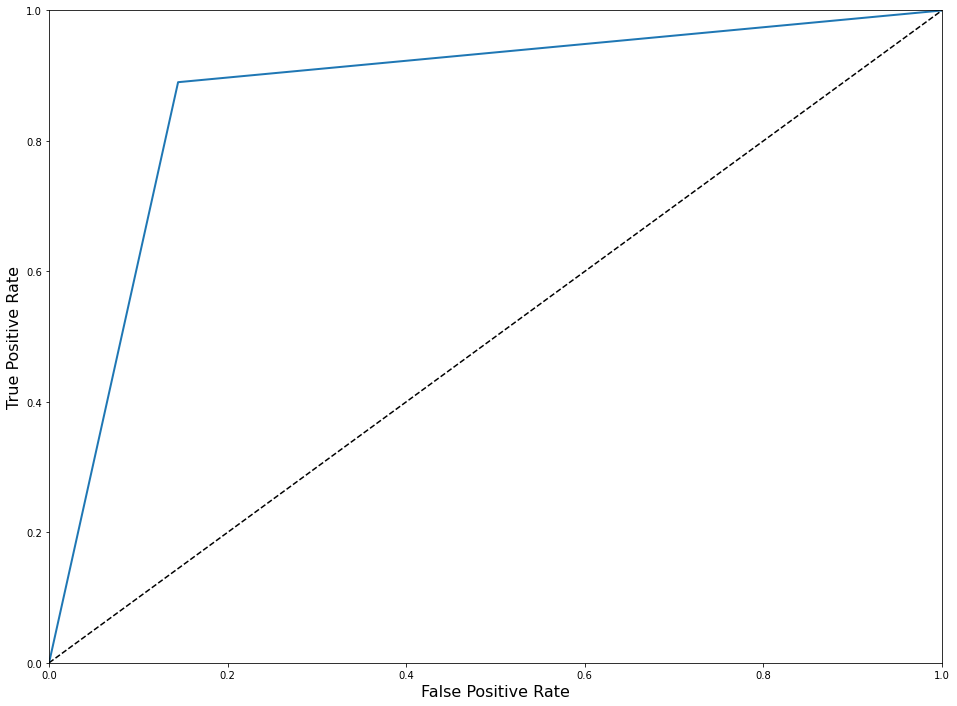

In [166]:
y_scores = cross_val_predict(sgd, X_train, y_train, cv=5)
fpr_sgd, tpr_sgd, thresholds_sgd = roc_curve(y_train, y_scores)

plt.figure(figsize=(16, 12))
plot_roc_curve(fpr_sgd, tpr_sgd)
plt.show()

> KNN 보다는 1에 덜 가깝지만 나쁘지 않은 성능을 보이고 있음

오차행렬 thresholds 튜닝

In [151]:
y_scores = cross_val_predict(sgd, X_train, y_train, cv=5, method='decision_function')

from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores)

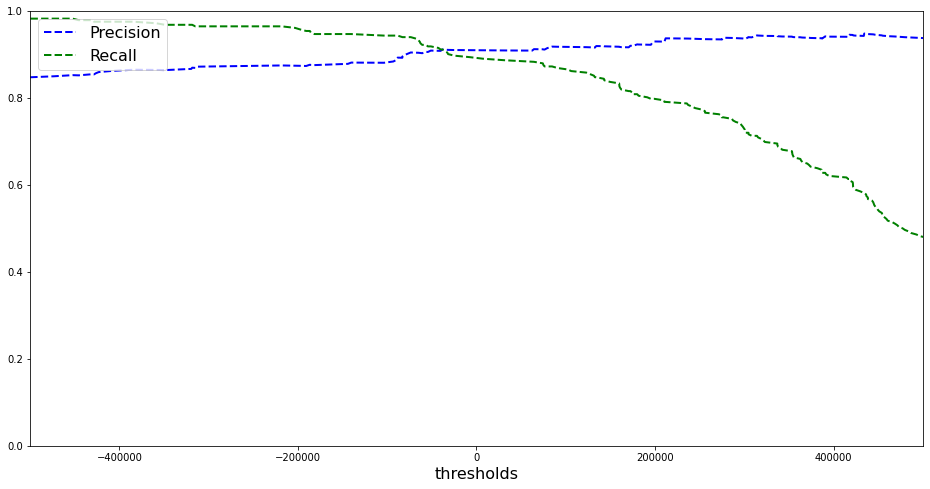

In [152]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
  plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
  plt.plot(thresholds, recalls[:-1], "g--", label="Recall", linewidth=2)
  plt.xlabel("thresholds", fontsize=16)
  plt.legend(loc="upper left", fontsize=16)
  plt.ylim([0,1])

plt.figure(figsize=(16, 8))
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.xlim([-500000, 500000])
plt.show()

In [164]:
# 해당 문제에서는 정밀도가 더 중요하다고 판단하여 임계값을 줄여 정밀도를 높여주었음
sgd_train_pred_93 = (y_scores > 250000)

print("정밀도(Precision) : ", precision_score(y_train, sgd_train_pred_93))
print("재현율(Recall)    : ", recall_score(y_train, sgd_train_pred_93))
print("f1 score          : ", f1_score(y_train, sgd_train_pred_93))

정밀도(Precision) :  0.9356223175965666
재현율(Recall)    :  0.7730496453900709
f1 score          :  0.846601941747573


# 결론

> accuracy score나 roc curve로 본 분류 성능면에서 KNN > SGDClassifier

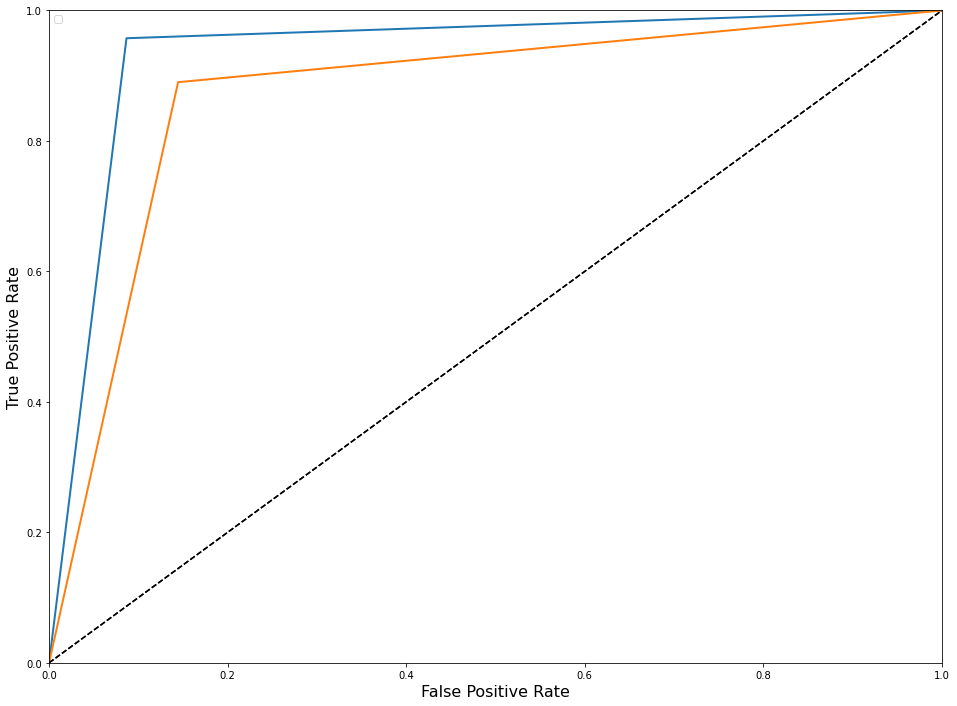

In [173]:
def plot_roc_curve(fpr, tpr):
  plt.plot(fpr, tpr, linewidth=2)
  plt.plot([0,1], [0,1], 'k--')
  plt.axis([0,1,0,1])
  plt.legend()
  plt.xlabel('False Positive Rate', fontsize=16)
  plt.ylabel('True Positive Rate', fontsize=16)

plt.figure(figsize=(16, 12))
plot_roc_curve(fpr_knc, tpr_knc)
plot_roc_curve(fpr_sgd, tpr_sgd)
plt.show()

# 파란색은 KNN, 주황색은 SGD